In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import shap

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import loguniform, uniform
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.semi_supervised import LabelSpreading
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report, accuracy_score as accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468) 
  
# data (as pandas dataframes) 
X = online_shoppers_purchasing_intention_dataset.data.features 
y = online_shoppers_purchasing_intention_dataset.data.targets 
  
# metadata 
#print(online_shoppers_purchasing_intention_dataset.metadata) 
  
# variable information 
print(online_shoppers_purchasing_intention_dataset.variables) 

                       name     role         type demographic description  \
0            Administrative  Feature      Integer        None        None   
1   Administrative_Duration  Feature      Integer        None        None   
2             Informational  Feature      Integer        None        None   
3    Informational_Duration  Feature      Integer        None        None   
4            ProductRelated  Feature      Integer        None        None   
5   ProductRelated_Duration  Feature   Continuous        None        None   
6               BounceRates  Feature   Continuous        None        None   
7                 ExitRates  Feature   Continuous        None        None   
8                PageValues  Feature      Integer        None        None   
9                SpecialDay  Feature      Integer        None        None   
10                    Month  Feature  Categorical        None        None   
11         OperatingSystems  Feature      Integer        None        None   

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
X.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
X.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

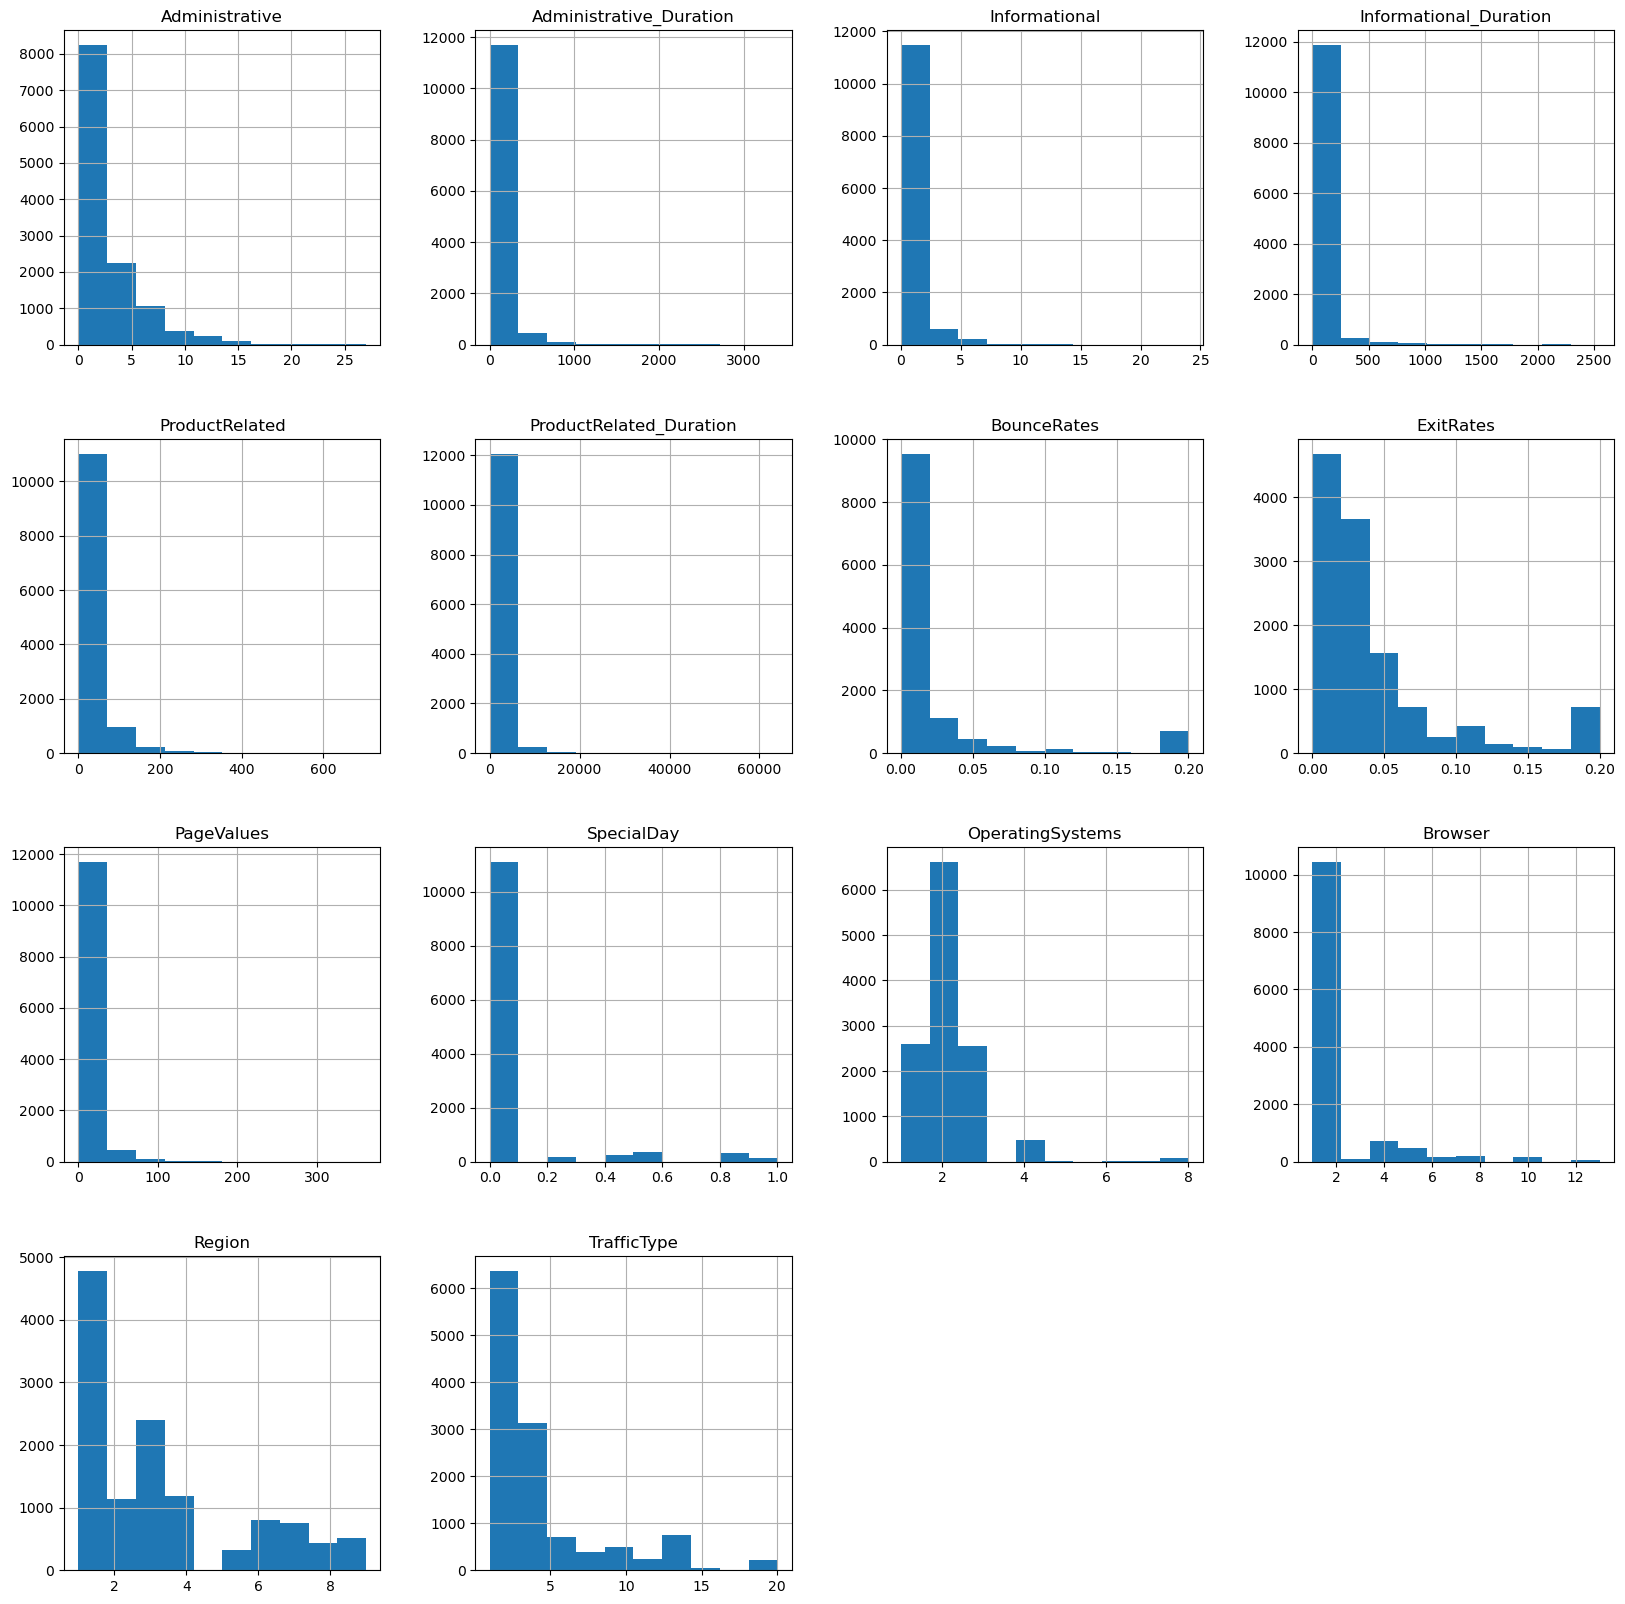

In [11]:
X.hist(figsize=(20,20))
plt.show()

In [13]:
X_cat = X.select_dtypes(include = ['object', 'bool']).columns
print(X_cat, '\n')

for col in X_cat:
    print(f"Frequency of {col}:")
    print(X[col].value_counts(), '\n')

Index(['Month', 'VisitorType', 'Weekend'], dtype='object') 

Frequency of Month:
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64 

Frequency of VisitorType:
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64 

Frequency of Weekend:
Weekend
False    9462
True     2868
Name: count, dtype: int64 



In [15]:
y.value_counts()

Revenue
False      10422
True        1908
Name: count, dtype: int64

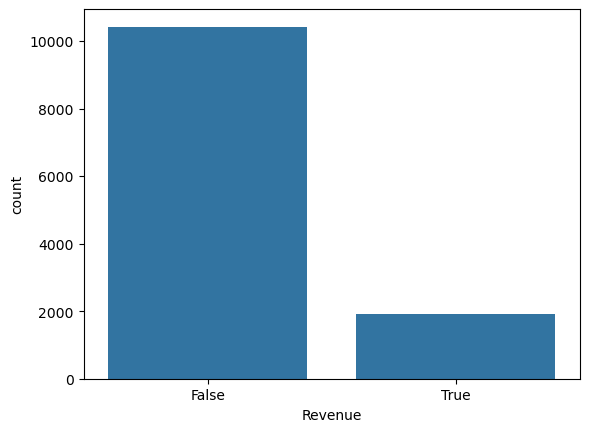

In [17]:
# Class distribution for Revenue
sns.countplot(x='Revenue', data=y)
plt.show()

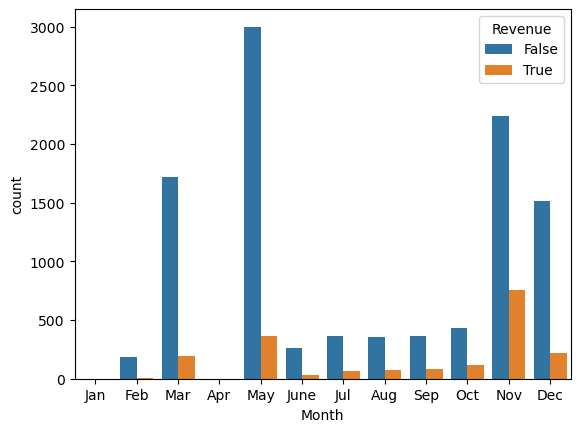

In [19]:
# Categorical data
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
sns.countplot(x = X['Month'], data = y, hue = "Revenue", order = month_dict.keys())
plt.show()

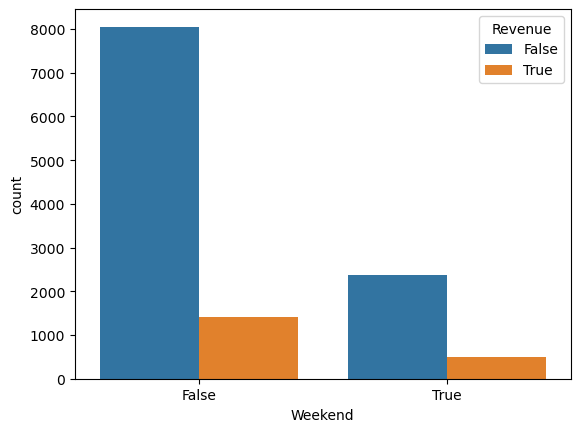

In [21]:
# Categorical data
data = pd.concat([X,y],axis = 1)
sns.countplot(x='Weekend', data=data, hue= 'Revenue')
plt.show()

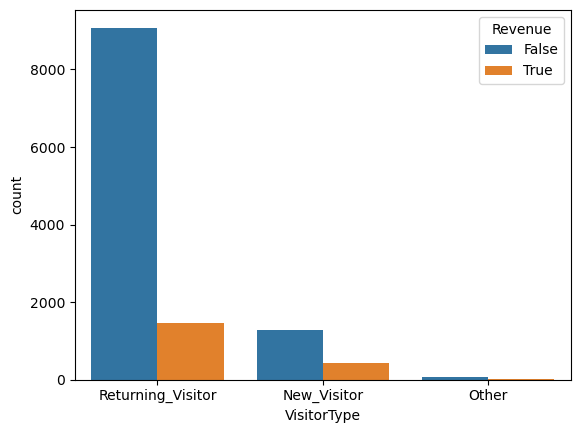

In [23]:
# Categorical data
sns.countplot(x = X['VisitorType'], data = y, hue = 'Revenue')
plt.show()

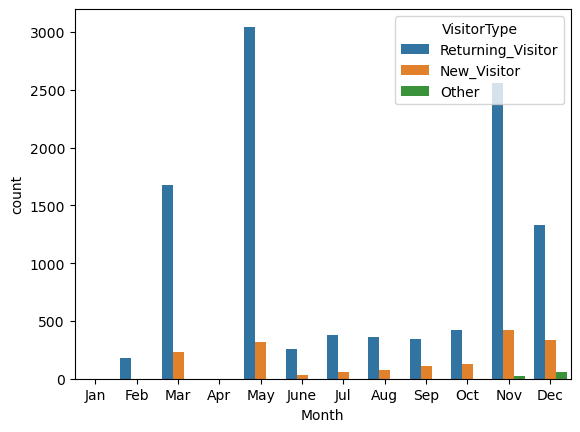

In [25]:
sns.countplot(x = X.Month, data = X, hue = X.VisitorType, order = month_dict.keys())
plt.show()

VisitorType  New_Visitor  Other  Returning_Visitor
Month                                             
Aug                 72.0    0.0              361.0
Dec                335.0   62.0             1330.0
Feb                  1.0    0.0              183.0
Jul                 54.0    0.0              378.0
June                30.0    1.0              257.0
Mar                232.0    0.0             1675.0
May                319.0    0.0             3045.0
Nov                419.0   22.0             2557.0
Oct                124.0    0.0              425.0
Sep                108.0    0.0              340.0 

VisitorType  New_Visitor  Other  Returning_Visitor
Feb                  1.0    0.0              183.0
Mar                232.0    0.0             1675.0
May                319.0    0.0             3045.0
June                30.0    1.0              257.0
Jul                 54.0    0.0              378.0
Aug                 72.0    0.0              361.0
Sep                108.0    0

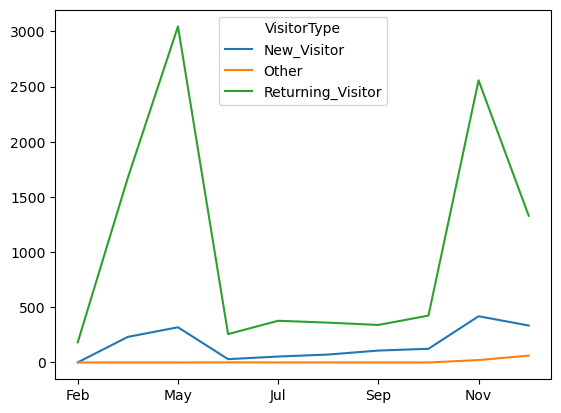

In [27]:
mon_visitor = X.groupby('Month')['VisitorType'].value_counts().unstack().fillna(0)
print(mon_visitor, '\n')

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mon_visitor.index = pd.Categorical(mon_visitor.index, categories=month_order, ordered=True)
mon_visitor = mon_visitor.sort_index()
print(mon_visitor, '\n')

# Plot 
mon_visitor.plot(kind='line')
plt.show()

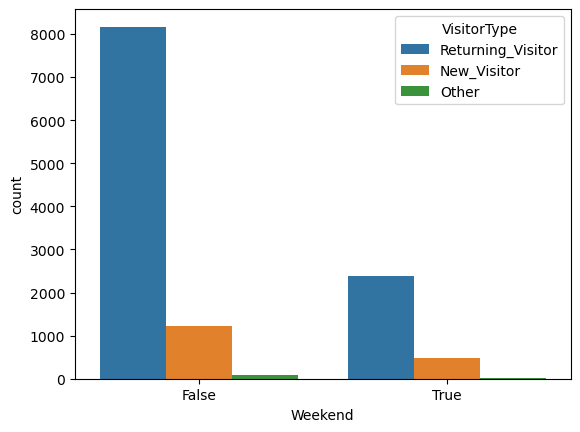

In [29]:
sns.countplot(x = X.Weekend, data = X, hue = X.VisitorType)
plt.show()

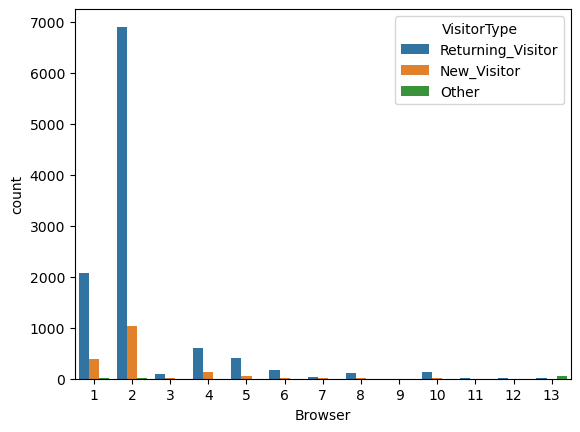

In [31]:
sns.countplot(x = X.Browser, data = X, hue = X.VisitorType)
plt.show()

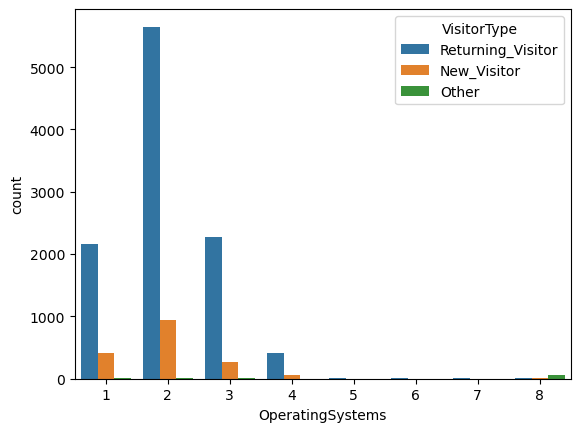

In [33]:
sns.countplot(x = X.OperatingSystems, data = X, hue = X.VisitorType)
plt.show()

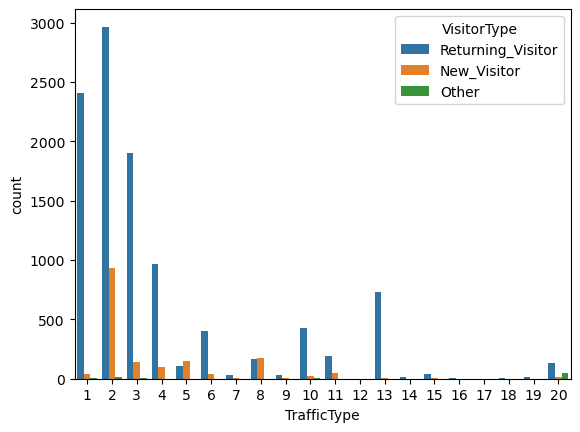

In [35]:
sns.countplot(x = X.TrafficType, data = X, hue = X.VisitorType)
plt.show()

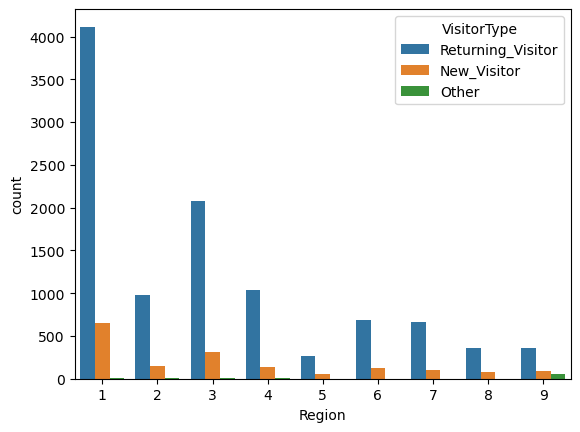

In [37]:
sns.countplot(x = X.Region, data = X, hue = X.VisitorType)
plt.show()

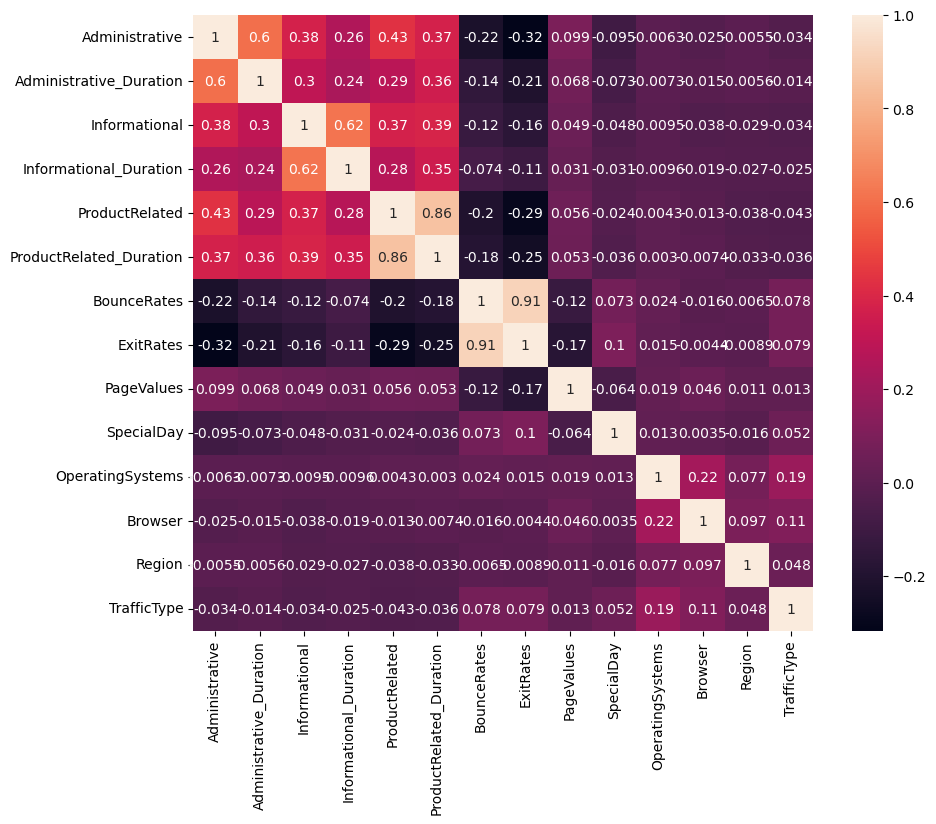

In [39]:
num_data = data.select_dtypes(include='number')
corr = num_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

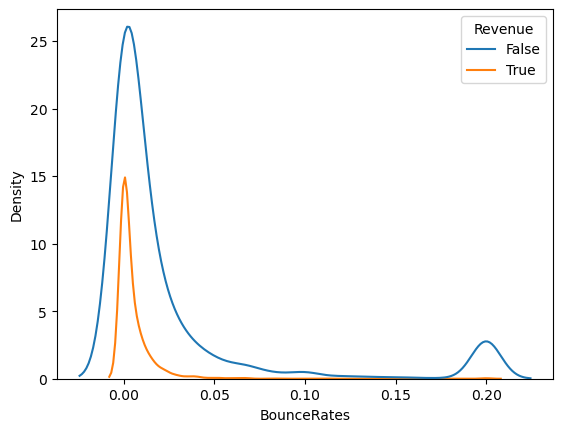

In [41]:
sns.kdeplot(x = X.BounceRates, data = y, hue = 'Revenue')
plt.show()

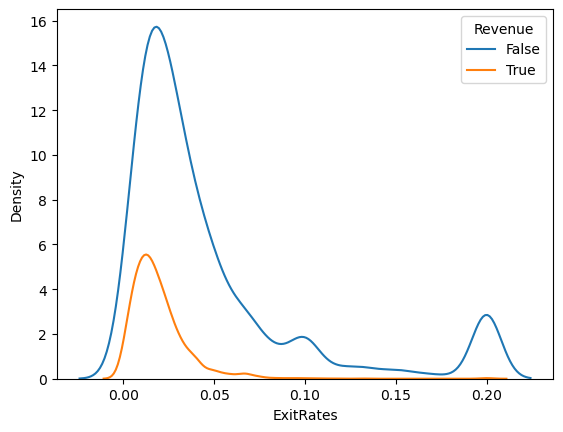

In [43]:
sns.kdeplot(x = X.ExitRates, data = y, hue = 'Revenue')
plt.show()

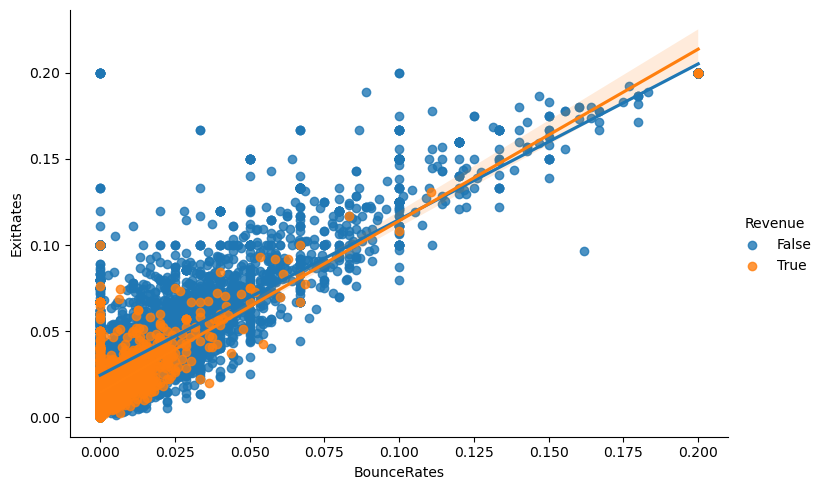

In [45]:
# Relationship between BounceRates and ExitRates
sns.lmplot(data=data, x='BounceRates', y='ExitRates', hue='Revenue', aspect=1.5)
plt.show()

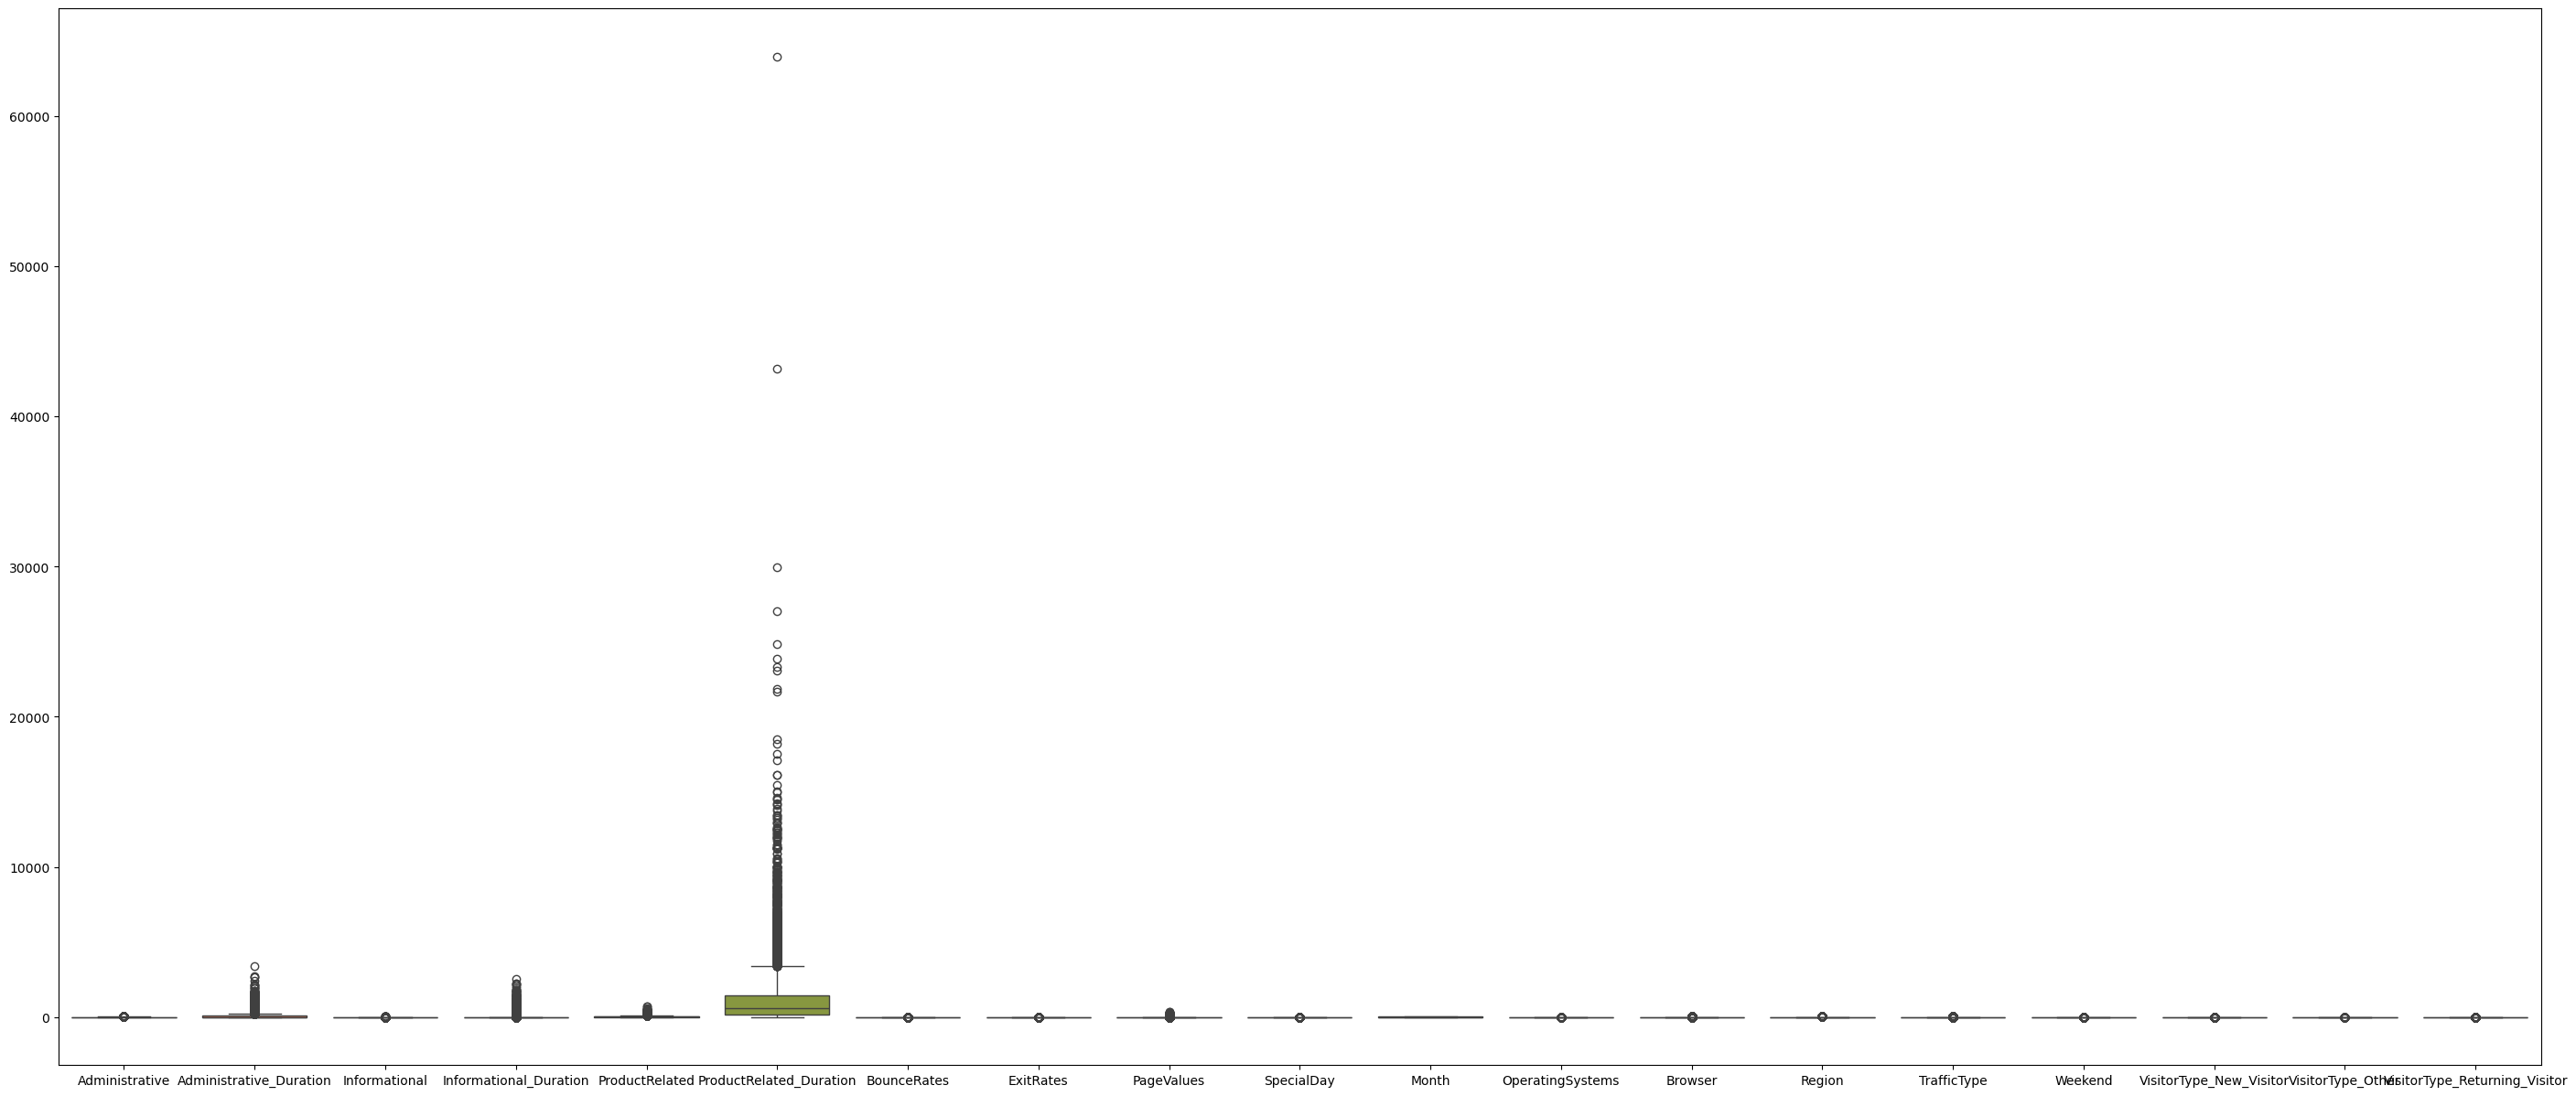

In [93]:
plt.figure(figsize=(35, 15))
sns.boxplot(data = X)
plt.show()

### Modeling

In [47]:
X.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
dtype: object

In [49]:
month_dict.values()

dict_values([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [51]:
X.loc[:, 'Month'] = X['Month'].replace(month_dict)

C:\Users\choin\AppData\Local\Temp\ipykernel_14444\2586949525.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.loc[:, 'Month'] = X['Month'].replace(month_dict)


In [53]:
X.Month.value_counts()

Month
5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: count, dtype: int64

In [55]:
X = pd.get_dummies(X, columns=['VisitorType'])

In [57]:
X.dtypes

Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
Month                             object
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
Weekend                             bool
VisitorType_New_Visitor             bool
VisitorType_Other                   bool
VisitorType_Returning_Visitor       bool
dtype: object

### Preparing the Train and Test Data

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)
print("Length of training set:" +str(len(X_train)))

Length of training set:9864


In [61]:
std_scaler = StandardScaler()
std_scaler.fit(X)
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_std, columns=X.columns)
X_test = pd.DataFrame(X_test_std, columns=X.columns)

In [63]:
display(X_train.head())
display(X_test.head())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.556092,-0.574703,-0.163049,0.387532,-0.317178,-0.308821,-1.371174,-0.136078,2.121412,-0.894178,-0.762629,-0.550552,-0.399087,-0.083316,0.410621
1,-0.094882,-0.377993,-0.396478,-0.244931,1.107813,0.129163,-0.406759,-0.599652,-0.168016,-0.308821,0.986828,-0.136078,-0.207952,-0.061364,-0.514182,-0.550552,-0.399087,-0.083316,0.410621
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.371174,-0.136078,-0.207952,-0.894178,-0.762629,-0.550552,-0.399087,-0.083316,0.410621
3,0.808283,-0.178867,2.752868,2.447910,-0.601062,-0.585363,-0.457683,-0.512217,0.131275,-0.308821,0.397327,-0.136078,-0.207952,2.020674,-0.514182,-0.550552,2.505720,-0.083316,-2.435336
4,-0.696993,-0.457191,0.390859,-0.209405,-0.511122,-0.478548,0.367291,-0.028936,-0.317178,-0.308821,0.986828,0.961270,-0.207952,1.604266,0.976499,1.816360,2.505720,-0.083316,-2.435336


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.206173,0.348932,-0.396478,-0.244931,0.365801,-0.074462,-0.368012,-0.617956,-0.317178,-0.308821,0.986828,-1.233426,3.286094,1.187859,1.721839,-0.550552,-0.399087,-0.083316,0.410621
1,1.109339,2.017134,1.178195,1.428680,1.152783,0.684125,-0.412355,-0.785204,-0.204820,-0.308821,-1.371174,-0.136078,-0.207952,-0.061364,-0.514182,-0.550552,-0.399087,-0.083316,0.410621
2,-0.395938,-0.224547,-0.396478,-0.244931,2.119647,1.627964,-0.443497,-0.622497,-0.131313,-0.308821,0.986828,-0.136078,-0.207952,-0.477771,-0.514182,-0.550552,-0.399087,-0.083316,0.410621
3,-0.094882,0.340447,-0.396478,-0.244931,-0.488636,-0.307317,-0.285813,-0.343329,1.657882,-0.308821,0.102577,-0.136078,1.539071,1.604266,-0.017289,-0.550552,-0.399087,-0.083316,0.410621
4,4.722002,2.983061,4.327541,4.968806,3.064025,1.961574,-0.320907,-0.607996,0.229506,-0.308821,0.102577,-0.136078,-0.207952,-0.061364,-0.762629,1.816360,-0.399087,-0.083316,0.410621


In [65]:
X_train.shape

(9864, 19)

In [67]:
X_test.shape

(2466, 19)

In [69]:
df_model_summary_cat = pd.DataFrame(
   {
      "Model": [],
      "Recall": [],
      "Specificity": [],
      "Precision": [],
      "Balanced Accuracy": [],
      "F1-Score": []
   }
)


def add_score_cat(model, recall, specificity, precision, balanced_accuracy, f1_score):
   df_model_summary_cat.loc[df_model_summary_cat.shape[0]] = [model, recall, specificity, precision, balanced_accuracy,
                                                              f1_score]

### Logistic Regression 

In [71]:
clf = LogisticRegression(random_state=42, C=10)
clf.fit(X_train, y_train.values.ravel())
y_train_pred = clf.predict(X_train)

# code to calculate accuracy scores and confusion matrices
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

matrix = confusion_matrix(y_train, y_train_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_train, y_train_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print('Accuracy: %.2f' % accuracy)
print('Specificity: %.2f' % specificity)
print('Recall: %.2f' % recall)
print('Precision: %.2f' % precision)
print('F1-Score: %.2f' % f1)

add_score_cat("LogisticRegression", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

       False       0.90      0.98      0.94      8367
        True       0.75      0.37      0.50      1497

    accuracy                           0.89      9864
   macro avg       0.83      0.67      0.72      9864
weighted avg       0.88      0.89      0.87      9864

[[8186  181]
 [ 941  556]]
[[8186  181]
 [ 941  556]]
Accuracy: 0.89
Specificity: 0.98
Recall: 0.37
Precision: 0.75
F1-Score: 0.50


### Random Forest

In [73]:
clf_gb = RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)
clf_gb.fit(X_train, y_train.values.ravel())
y_train_pred = clf_gb.predict(X_train)

print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

matrix = confusion_matrix(y_train, y_train_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_train, y_train_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

add_score_cat("RandomForestClassifier", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

       False       0.95      0.98      0.97      8367
        True       0.89      0.71      0.79      1497

    accuracy                           0.94      9864
   macro avg       0.92      0.85      0.88      9864
weighted avg       0.94      0.94      0.94      9864

[[8230  137]
 [ 433 1064]]
[[8230  137]
 [ 433 1064]]
Accuracy: 0.942
Specificity: 0.984
Recall: 0.711
Precision: 0.886
F1-Score: 0.789


### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
clfd = DecisionTreeClassifier(max_depth=10, random_state=42)
clfd.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)

# code to calculate accuracy scores and confusion matrices
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

matrix = confusion_matrix(y_train, y_train_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_train, y_train_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

add_score_cat("DecisionTree", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

       False       0.90      0.98      0.94      8367
        True       0.75      0.37      0.50      1497

    accuracy                           0.89      9864
   macro avg       0.83      0.67      0.72      9864
weighted avg       0.88      0.89      0.87      9864

[[8186  181]
 [ 941  556]]
[[8186  181]
 [ 941  556]]
Accuracy: 0.886
Specificity: 0.978
Recall: 0.371
Precision: 0.754
F1-Score: 0.498


### AdaBoost Classifier

In [77]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

clf5 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, random_state=42), 
                          n_estimators=200,algorithm='SAMME', 
                          random_state=0)

clf5.fit(X_train, y_train.values.ravel())
y_train_pred = clf5.predict(X_train)

# Print classification report and confusion matrix
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

matrix = confusion_matrix(y_train, y_train_pred)
print(matrix)

# Calculate additional metrics
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_train, y_train_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

# Display the calculated metrics
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

# Call the function to add scores if defined
add_score_cat("AdaBoostClassifier", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

       False       0.93      0.95      0.94      8367
        True       0.68      0.59      0.63      1497

    accuracy                           0.90      9864
   macro avg       0.80      0.77      0.79      9864
weighted avg       0.89      0.90      0.89      9864

[[7950  417]
 [ 614  883]]
[[7950  417]
 [ 614  883]]
Accuracy: 0.895
Specificity: 0.950
Recall: 0.590
Precision: 0.679
F1-Score: 0.631


### Hypertuning

##### GridSearch CV

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Logistic Regression
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solver for optimization
    'max_iter': [100, 200, 300]  # Max iterations
}

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Perform GridSearchCV
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_logreg.fit(X_train, y_train.values.ravel())

# Best parameters and score from grid search
print(f"Best parameters for Logistic Regression: {grid_search_logreg.best_params_}")
print(f"Best score for Logistic Regression: {grid_search_logreg.best_score_}")

# Make predictions on the training set using the best model
y_train_pred_logreg = grid_search_logreg.predict(X_train)

# Print classification report
print("Training Set (Logistic Regression):\n")
print(classification_report(y_train, y_train_pred_logreg))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
Best score for Logistic Regression: 0.8857466775094609
Training Set (Logistic Regression):

              precision    recall  f1-score   support

       False       0.90      0.98      0.94      8367
        True       0.75      0.37      0.50      1497

    accuracy                           0.89      9864
   macro avg       0.83      0.67      0.72      9864
weighted avg       0.88      0.89      0.87      9864



##### RandomizedSearch CV

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import uniform
import numpy as np

# Define the Logistic Regression model
logreg = LogisticRegression(solver='liblinear', random_state=42)

# Define the hyperparameter search space using scipy.stats distributions
param_dist_logreg = {
    'penalty': ['l1', 'l2'],  # Discrete distribution for penalty type
    'C': uniform(loc=0, scale=10)  # Uniform distribution for C (between 0 and 10)
}

# Perform RandomizedSearchCV
random_search_logreg = RandomizedSearchCV(
    logreg,
    param_distributions=param_dist_logreg,
    n_iter=100,  # Number of iterations to sample
    cv=5,        # 5-fold cross-validation
    scoring='accuracy',  # Scoring metric (accuracy in this case)
    n_jobs=-1,   # Use all available cores
    verbose=1,   # Show progress
    random_state=42
)

# Fit the RandomizedSearchCV model
random_search_logreg.fit(X_train, y_train.values.ravel())  # Ensure y_train is 1D

# Best parameters and score from random search
print(f"Best parameters for Logistic Regression: {random_search_logreg.best_params_}")
print(f"Best score for Logistic Regression: {random_search_logreg.best_score_}")

# Make predictions on the training set using the best model
y_train_pred_logreg = random_search_logreg.predict(X_train)

# Print classification report for training set predictions
print("Training Set (Logistic Regression):\n")
print(classification_report(y_train, y_train_pred_logreg))

print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)
add_score_cat("Hyperparameter for Logistic Regression", recall, specificity, precision, accuracy, f1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for Logistic Regression: {'C': 0.9541011649041131, 'penalty': 'l1'}
Best score for Logistic Regression: 0.8859494144582698
Training Set (Logistic Regression):

              precision    recall  f1-score   support

       False       0.90      0.98      0.94      8367
        True       0.76      0.37      0.50      1497

    accuracy                           0.89      9864
   macro avg       0.83      0.67      0.72      9864
weighted avg       0.88      0.89      0.87      9864

Accuracy: 0.869
Specificity: 0.934
Recall: 0.545
Precision: 0.624
F1-Score: 0.582


#### MLP Classifier

In [109]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Create an MLP classifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42)

# Fit the model to the training data
clf_mlp.fit(X_train, y_train.values.ravel())

# Predict the target values for the training set
y_train_pred = clf_mlp.predict(X_train)

# Print the classification report and confusion matrix
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

# Get the confusion matrix
matrix = confusion_matrix(y_train, y_train_pred)
print(matrix)

# Extract TP, TN, FP, FN values
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_train, y_train_pred)
specificity = TN / (TN + FP)
recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

# Print the metrics
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

# Assuming add_score_cat is a function to store or print these results
add_score_cat("MLPClassifier", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

       False       0.97      0.98      0.97      8367
        True       0.87      0.81      0.84      1497

    accuracy                           0.95      9864
   macro avg       0.92      0.89      0.91      9864
weighted avg       0.95      0.95      0.95      9864

[[8190  177]
 [ 283 1214]]
[[8190  177]
 [ 283 1214]]
Accuracy: 0.953
Specificity: 0.979
Recall: 0.811
Precision: 0.873
F1-Score: 0.841


In [111]:
df_model_summary_cat

,Model,Recall,Specificity,Precision,Balanced Accuracy,F1-Score
0,LogisticRegression,0.371409,0.978367,0.754410,0.886253,0.497762
1,RandomForestClassifier,0.710755,0.983626,0.885928,0.942214,0.788732
2,DecisionTree,0.371409,0.978367,0.754410,0.886253,0.497762
3,AdaBoostClassifier,0.589846,0.950161,0.679231,0.895479,0.631391
4,Hyperparameter for Logistic Regression,0.545012,0.934307,0.623955,0.869424,0.581818
5,MLPClassifier,0.810955,0.978845,0.872753,0.953366,0.840720


#### Test Model (Random Forest Classifier)

In [135]:
clf_t = RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)
clf_t.fit(X_train, y_train.values.ravel())
y_test_pred = clf_t.predict(X_test)

print("\nTest Set:\n")
print(classification_report(y_test, y_test_pred))
matrix = confusion_matrix(y_test, y_test_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_test, y_test_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)


Test Set:

              precision    recall  f1-score   support

       False       0.91      0.96      0.93      2055
        True       0.72      0.50      0.59       411

    accuracy                           0.89      2466
   macro avg       0.82      0.73      0.76      2466
weighted avg       0.88      0.89      0.88      2466

[[1976   79]
 [ 204  207]]
Accuracy: 0.885
Specificity: 0.962
Recall: 0.504
Precision: 0.724
F1-Score: 0.594


#### ROC-ACU

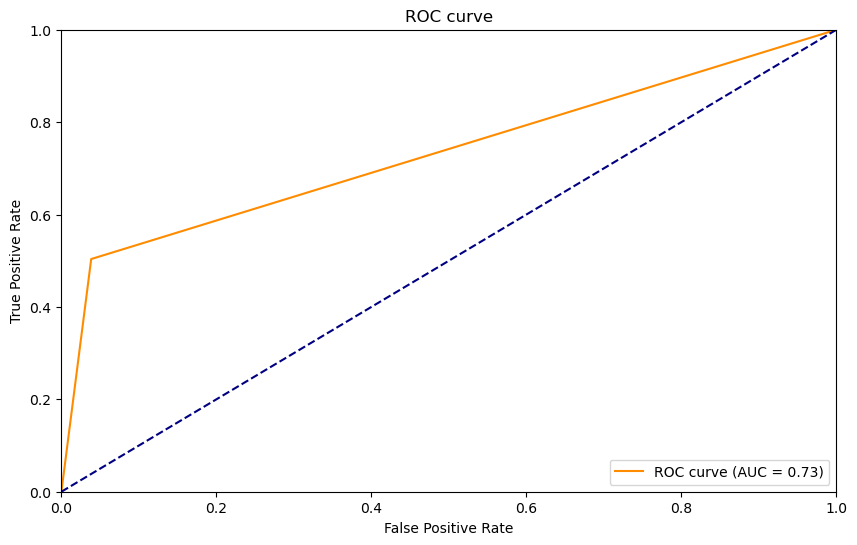

In [137]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fpr, tpr, thresholds =roc_curve(y_test, y_test_pred, pos_label=1)
roc_auc=roc_auc_score(y_test, y_test_pred)
plt.figure( figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Feature Importances

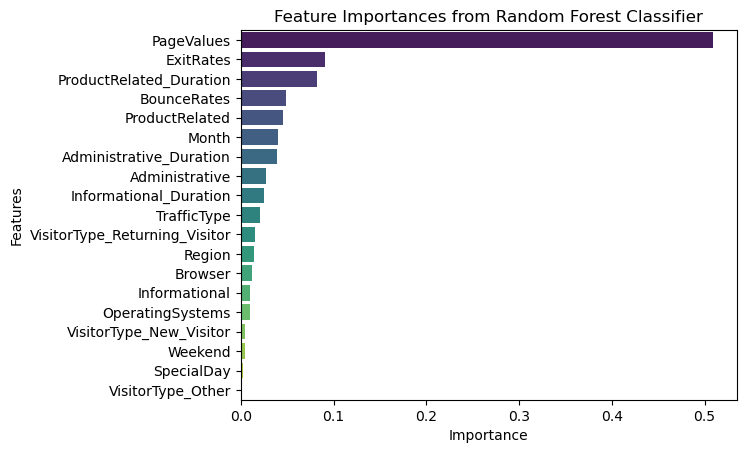

In [139]:
# feature importances
feature_importances = clf_t.feature_importances_

importance_df = pd.DataFrame({"Features": X.columns, "Importance": feature_importances})

# Create the plot with explicit `hue=None` to avoid the warning
sns.barplot(x="Importance", y="Features", data=importance_df.sort_values(by="Importance", ascending=False), palette="viridis", hue="Features", legend=False)
plt.title("Feature Importances from Random Forest Classifier")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

#### Test model (Multi-Layer Perceptron Classifier)

In [129]:
clf_ = MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42)
clf_t.fit(X_train, y_train.values.ravel())
y_test_pred = clf_t.predict(X_test)

print("\nTest Set:\n")
print(classification_report(y_test, y_test_pred))
matrix = confusion_matrix(y_test, y_test_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_test, y_test_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)


Test Set:

              precision    recall  f1-score   support

       False       0.91      0.93      0.92      2055
        True       0.62      0.55      0.58       411

    accuracy                           0.87      2466
   macro avg       0.77      0.74      0.75      2466
weighted avg       0.86      0.87      0.87      2466

[[1920  135]
 [ 187  224]]
Accuracy: 0.869
Specificity: 0.934
Recall: 0.545
Precision: 0.624
F1-Score: 0.582


#### ROC-ACU

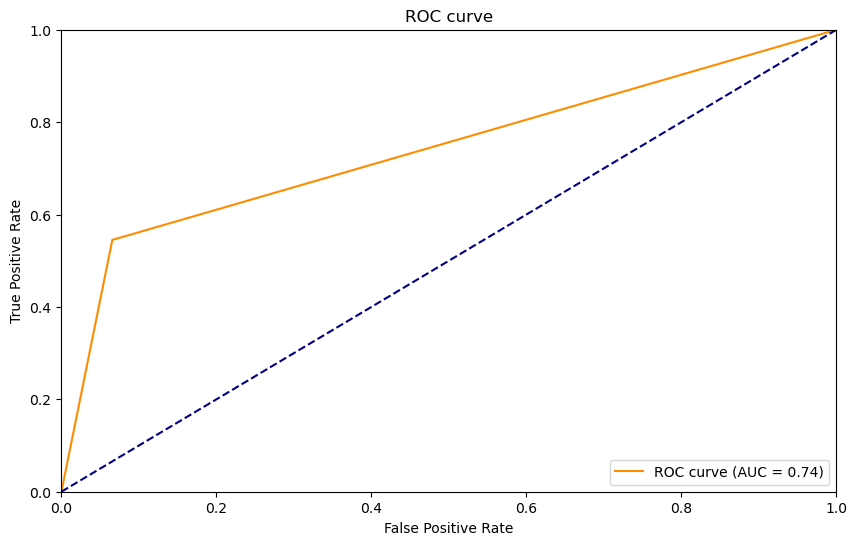

In [131]:
fpr, tpr, thresholds =roc_curve(y_test, y_test_pred, pos_label=1)
roc_auc=roc_auc_score(y_test, y_test_pred)
plt.figure( figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()